# Connected Component Labeling

Connected component analysis is a process of finding all the connected pixels in an image. This helps in extracting shapes from our image. This is better than contour extraction where there are several heirarchical contours in an image. 

To extract the connected components we can use skimage's measure.label function. This function takes as input a thresholded or binary image and the number of neighbors. The neighbours here refer to the north, west, northeast, northwest pixels. Since the entire image is scanned, 4 pixels scan gives an 8 neighbor connectivity. 

Each connected component is assigned a unique label as shown below. We can use these unique labels as masks to isolate the connected compoments 

![image](image/connected_components_connectivity.jpg)

![image](image/connected_components_labels_complete.jpg)

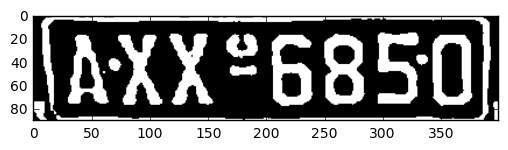

In [12]:
import cv2
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('image/license_plate.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Threshold the image to make it binary using adaptive thresholding

threshold = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,25,15)

plt.imshow(threshold,cmap='gray')
plt.show()

In [14]:
# Extracting the unique labels for the connected components
labels = measure.label(threshold,neighbors=8,background=0)

#Creating a mask for displaying the connected component
mask = np.zeros(threshold.shape,dtype='uint8')


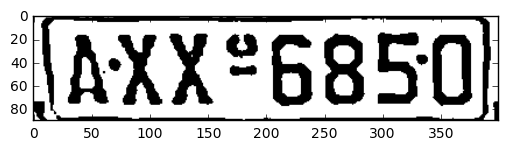

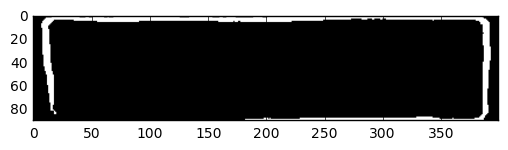

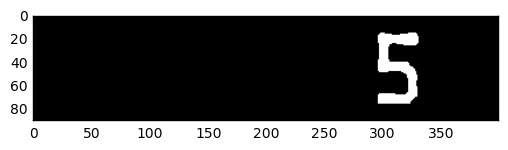

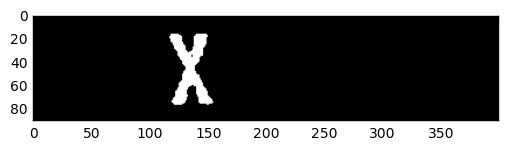

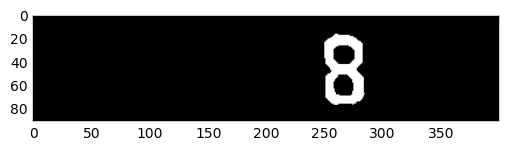

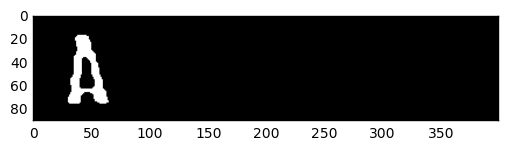

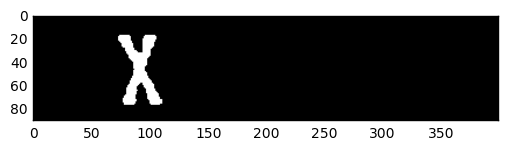

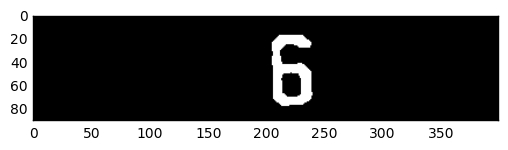

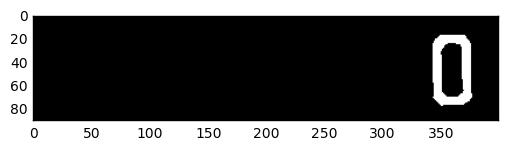

In [46]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1)
for i,label in enumerate(np.unique(labels)):
    
    blank = np.zeros(gray.shape,dtype='uint8')
    blank[labels == label ] = 255
    if cv2.countNonZero(blank) > 400:
        
        plt.imshow(blank,cmap='gray')
        plt.show()
        
        

## Contour extraction on the same image

As can be seen from the image below if we have to identify each letter and digit from a contour it would have been a tedious task

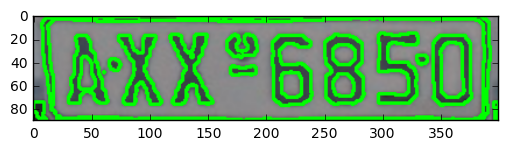

In [62]:
cnts = cv2.findContours(threshold.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
cv2.drawContours(clone,cnts[1],-1,(0,255,0),2)

plt.imshow(clone)
plt.show()